In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train.csv')
test = pd.read_csv(filepath_home+'test_x.csv')

In [3]:
# 분할 지점 저장해두고 데이터 통합 후 전처리
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [4]:
# tp01~tp10 칼럼만 self_describe 저장 
self_describe_cols = [ 'tp'+'0'*(2-len(str(i)))+str(i) for i in range(1,11)]
self_describe=data[self_describe_cols].copy()

# 10.14

### 수치적으로 한쪽으로 쏠린 질문들이 있나 : mean 값 1 or 7 에 근접한지

In [15]:
self_describe.mean()[(self_describe.mean()>4)|(self_describe.mean()<2)]

tp03    1.770588
tp05    1.338944
tp10    4.322903
dtype: float64

tp03 : 나는 다음 단어와 관련이 있다. - Dependable, self-disciplined(신뢰를 주며 자제력이 있는)  
tp05 : 나는 다음 단어와 관련이 있다. - Open to new experiences, complex(새로운 경험을 즐기며, 종종 복잡미묘한 감정이 드는)  
tp10 : 나는 다음 단어와 관련이 있다. - Conventional, uncreative(평범하고 특징없는)  

### countplot 으로 눈으로 확인

In [5]:
Labels = ['Extraverted, enthusiastic (외향적, 열정가득)',
          'Critical, quarrelsome (비판적, 싸우기를 좋아하는)',
          'Dependable, self-disciplined (신뢰를 주며 자제력이 있는)',
          'Anxious, easily upset (걱정이 많고 쉽게 화가나는)',
         'Open to new experiences, complex (새로운 경험을 즐기는)',
          'Reserved, quiet (내성적이고 조용한)',
          'Sympathetic, warm (따듯하고 공감을 잘하는)',
          'Disorganized, careless (부주의하고 산만한)',
         'Calm, emotionally stable (차분하고 안정된)',
          'Conventional, uncreative (평범하고 특징없는)']
sign = [True,False,True,False,True,True,True,False,True,False]

In [6]:
# 한글깨짐
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

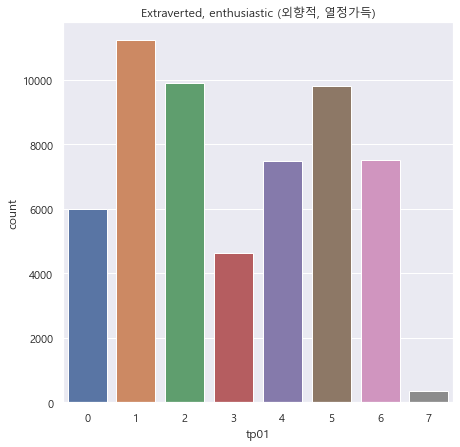

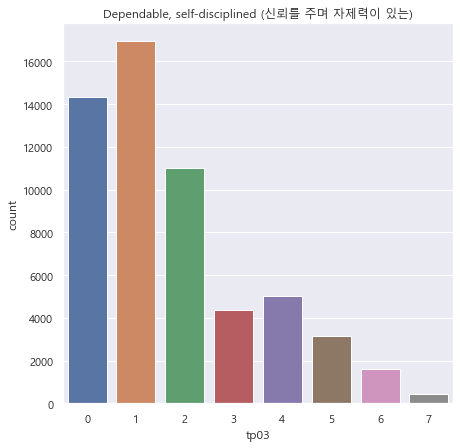

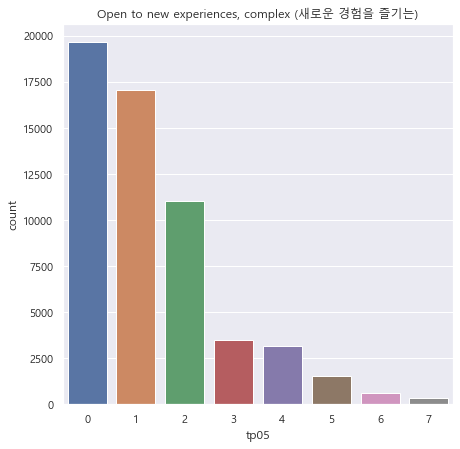

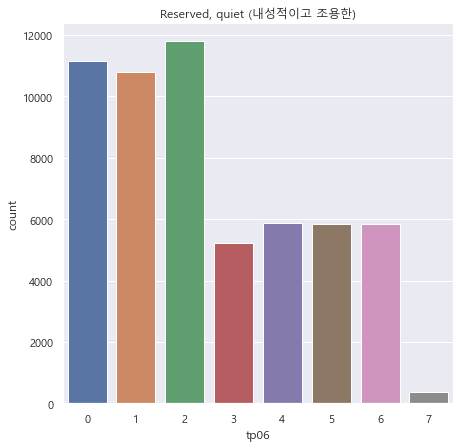

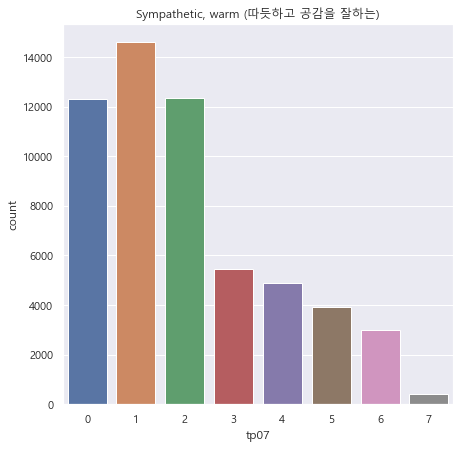

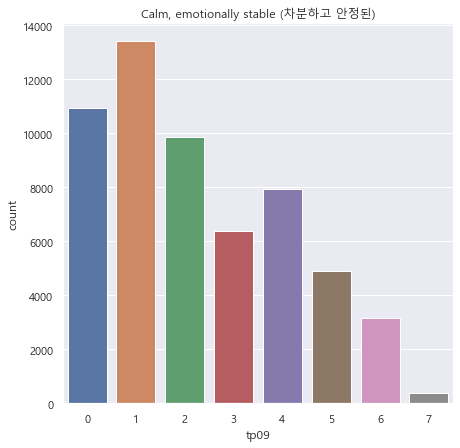

In [7]:
# 긍정 질문 (1,3,5,6,7,9)
head=0
for col in self_describe.columns:
    if sign[head]:
        fig,ax=plt.subplots(figsize=(7,7))
        sns.countplot(x=col,data=self_describe,ax=ax)
        ax.set_title(Labels[head])
    head+=1

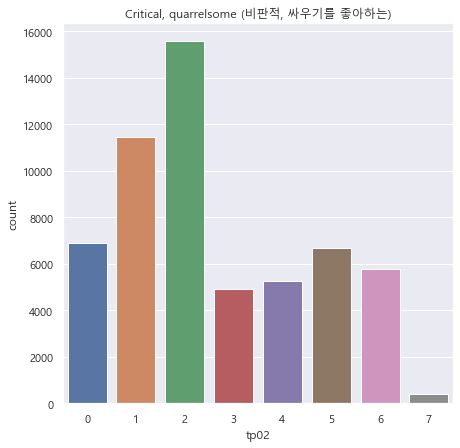

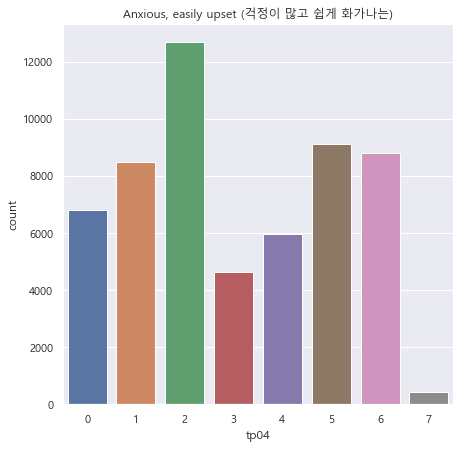

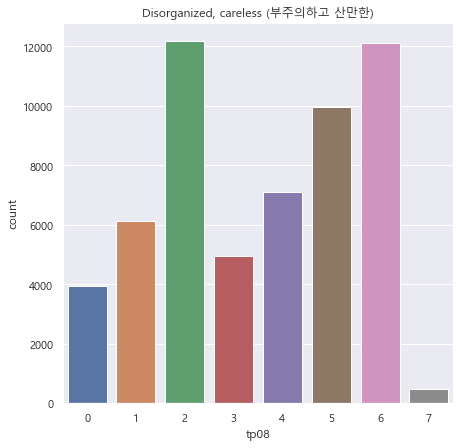

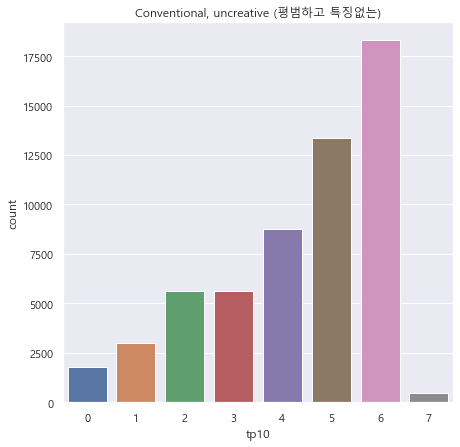

In [8]:
# 부정 질문 2,4,8,10
head=0
for col in self_describe.columns:
    if not sign[head]:
        fig,ax=plt.subplots(figsize=(7,7))
        sns.countplot(x=col,data=self_describe,ax=ax)
        ax.set_title(Labels[head])
    head+=1

# Summary
